In [49]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
files = glob.glob('data-to-use/*.csv')

Pass in user file, return df for that user

In [51]:
def create_user_df(file):
    df = pd.read_csv(file)
    df= df[(df['years'] == 2020)]
    df['datetime'] = pd.to_datetime(df.datetime)
    df = df.sort_values(by='datetime',ascending =True).reset_index()
    return df

Method to return a list of the sessions found in the passed in dataframe. 
A session is currently considered a series of actions performed in a row, with at maximum 60 minutes between each successive action

In [52]:
def create_session_list(user_df):
    break_time_minutes = 60
    sessions = []
    current_session = []
    for index, row in user_df.iterrows():
        if len(current_session) == 0:
            current_session.append(row)
        else:
            eventTimeDif = (row.datetime - current_session[-1].datetime).seconds
            if (pd.notnull(current_session[-1].durations)):
                difComp = int(current_session[-1].durations) + (60*break_time_minutes)
            else:
                difComp = (60*break_time_minutes)
            if eventTimeDif < difComp:
                current_session.append(row)
            else:
                if len(current_session) != 0:
                    sessions.append(current_session)
                current_session = [row]   
    if len(current_session) > 1:
        sessions.append(current_session)
    return sessions

Print out some core details on the list of trails that are passed in

In [53]:
def return_count_weekly(sessions):
    session_lengths_by_week = {}
    number_by_week = {}
    for session in sessions:
        if session[0]['datetime'].date().isocalendar()[1] in list(session_lengths_by_week.keys()):
            session_lengths_by_week[session[0]['datetime'].date().isocalendar()[1]].append(session)
        else:
            session_lengths_by_week[session[0]['datetime'].date().isocalendar()[1]] = [session]
    for week in session_lengths_by_week.keys():
        number_by_week[week] = len(session_lengths_by_week[week])
    for i in range(1,20):
        if i not in number_by_week.keys():
            number_by_week[i] = 0
    return number_by_week

In [54]:
def generate_session_means_counts(sessions):
    sessionsByDate = {}
    numByDate = {}
    meanByDate = {}
    for session in sessions:
        if session[0]['datetime'].date() in list(sessionsByDate.keys()):
            sessionsByDate[session[0]['datetime'].date()].append(session)
        else:
            sessionsByDate[session[0]['datetime'].date()] = [session]
            
    for date in list(sessionsByDate.keys()):
        dateSum = 0
        for session in sessionsByDate[date]:
            dateSum = dateSum + len(session)
        meanByDate[date] = dateSum/len(sessionsByDate[date])
    for i in sessionsByDate.keys():
        numByDate[i] = len(sessionsByDate[i])
    return meanByDate,numByDate

In [55]:
def return_session_duration(session):
    eventTimeDif = (session[-1].datetime - session[0].datetime).seconds
    return eventTimeDif/60

In [56]:
def return_average_daily(sessions):
    session_lengths_by_day = {}
    average_length_by_day = {}
    for session in sessions:
        if session[0]['datetime'].date() in list(session_lengths_by_day.keys()):
            session_lengths_by_day[session[0]['datetime'].date()].append(session)
        else:
            session_lengths_by_day[session[0]['datetime'].date()] = [session]
    for date in session_lengths_by_day.keys():
        totalSessionTime = 0
        for session in session_lengths_by_day[date]:
            session_duration = return_session_duration(session)
            totalSessionTime = totalSessionTime + session_duration
        average_length_by_day[date] = totalSessionTime/len(session_lengths_by_day[date])
    return average_length_by_day

In [57]:
def return_average_weekly(sessions):
    session_lengths_by_week = {}
    average_length_by_week = {}
    for session in sessions:
        if session[0]['datetime'].date().isocalendar()[1] in list(session_lengths_by_week.keys()):
            session_lengths_by_week[session[0]['datetime'].date().isocalendar()[1]].append(session)
        else:
            session_lengths_by_week[session[0]['datetime'].date().isocalendar()[1]] = [session]
    for week in session_lengths_by_week.keys():
        totalSessionTime = 0
        for session in session_lengths_by_week[week]:
            session_duration = return_session_duration(session)
            totalSessionTime = totalSessionTime + session_duration
        average_length_by_week[week] = totalSessionTime/len(session_lengths_by_week[week])
    for i in range(1,20):
        if i not in average_length_by_week.keys():
            average_length_by_week[i] = 0
    return average_length_by_week

Plot the passed in dictonary, originally intended to use this to plot the mean trail

In [58]:
def plot_dic_two(dic,dictwo): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    liststwo = sorted(dictwo.items()) # sorted by key, return a list of tuples
    xtwo, ytwo = zip(*liststwo) # unpack a list of pairs into two tuples
    plt.rcParams["figure.figsize"] = (15,5)
    plt.plot(xtwo, ytwo)
    plt.xticks(np.arange(0,20, 1.0))
    plt.axvline(x=10, ymin=0, ymax=1,color= "red")
    plt.xlabel('Week Number')
    plt.ylabel("Average Session Duration (Minutes)")
    
    plt.ylim(0,200)
    plt.xlim(0,20)
    plt.show()


In [59]:
def plot_dic(dic,y_lim,y_axis): 
    lists = sorted(dic.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.rcParams["figure.figsize"] = (15,5)
    plt.xticks(np.arange(0,20, 1.0))
    plt.axvline(x=10, ymin=0, ymax=1,color= "red")
    #plt.title('My title')
    plt.xlabel('Week Number')
    plt.ylabel(y_axis)
    
    plt.ylim(0,y_lim)
    plt.xlim(0,20)
    plt.show()


In [60]:
def filter_sessions(sessions,threshold):
    filtered_sessions = []
    for session in sessions:
        if len(session) > threshold:
            filtered_sessions.append(session)
    #print("returning",len(filtered_sessions),"/",len(sessions))
    return filtered_sessions

## Average duration in minutes of a session for each week.
- FOR ALL USERS COMBINED

Files Processed


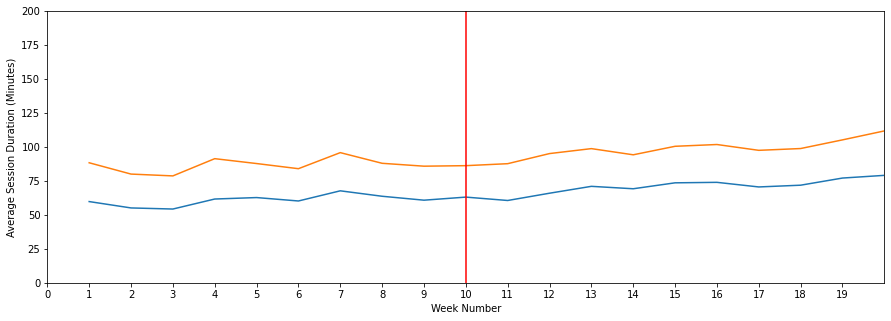

In [61]:
user_total_sessions = []
for f in files:
    user_df = create_user_df(f)
    user_sessions = create_session_list(user_df)
    user_total_sessions += user_sessions
print("Files Processed")
    
user_total_sessions_one = filter_sessions(user_total_sessions,2)
average_daily_session_length_one = return_average_weekly(user_total_sessions_one)

user_total_sessions_two = filter_sessions(user_total_sessions,5)
average_daily_session_length_two = return_average_weekly(user_total_sessions_two)

plot_dic_two(average_daily_session_length_one,average_daily_session_length_two)

## Average duration in minutes of a session for each week.
- Blue line = sessions with over 2 actions

data-to-use/15_39.csv


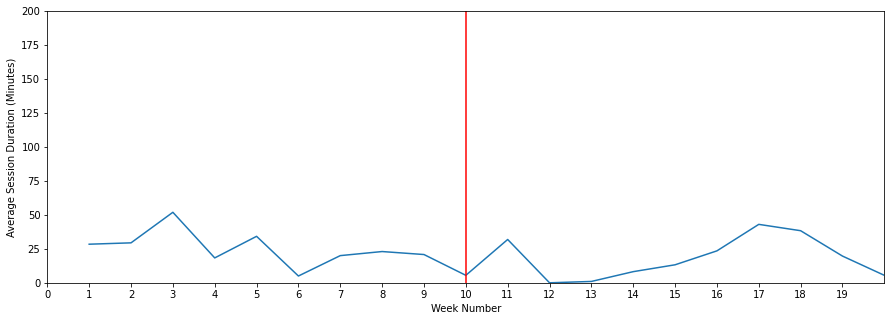

data-to-use/10_34.csv


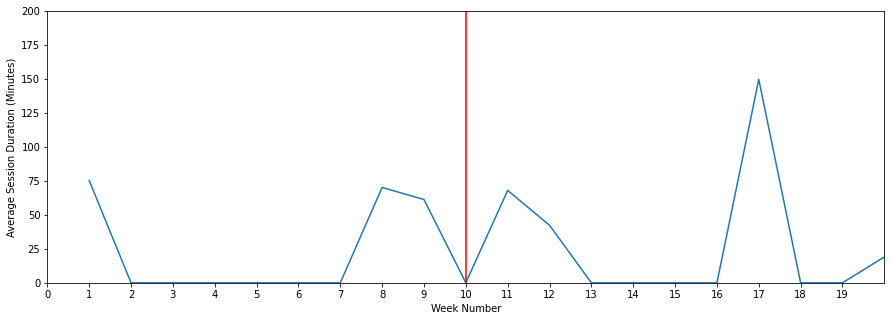

data-to-use/22_45.csv
data-to-use/6_65.csv


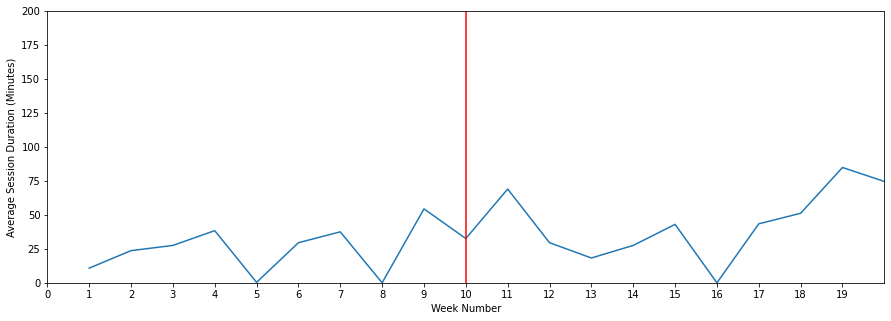

data-to-use/12_32.csv


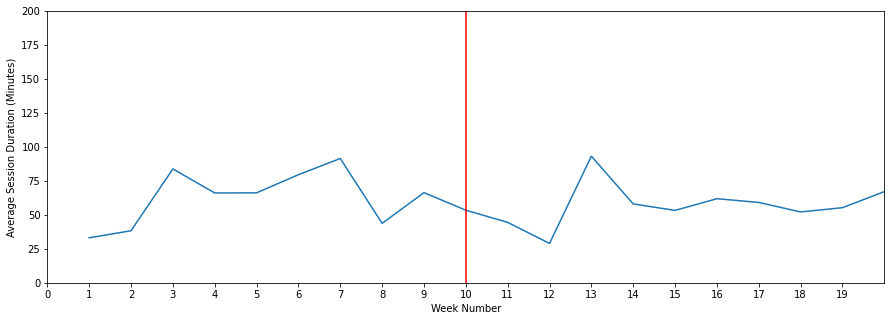

data-to-use/5_19.csv


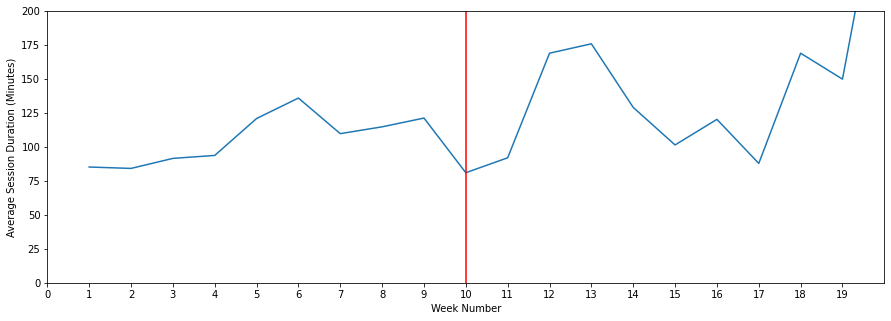

data-to-use/34_25.csv


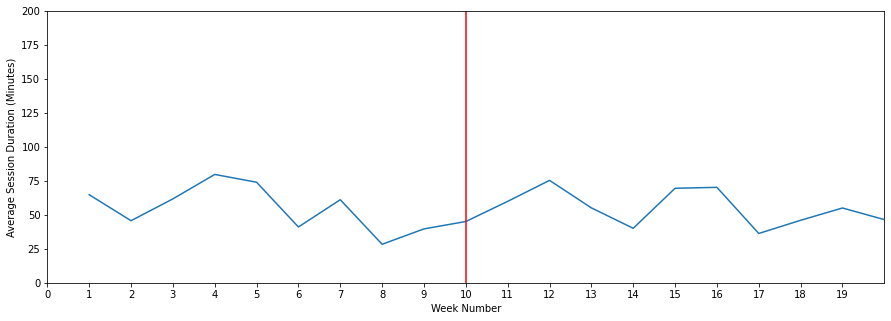

data-to-use/19_28.csv


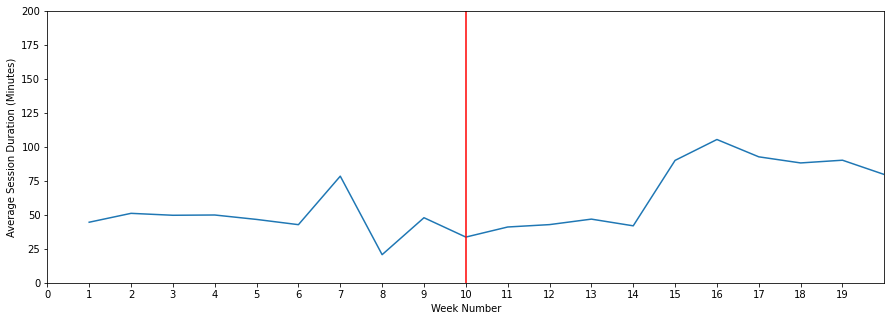

data-to-use/35_58.csv


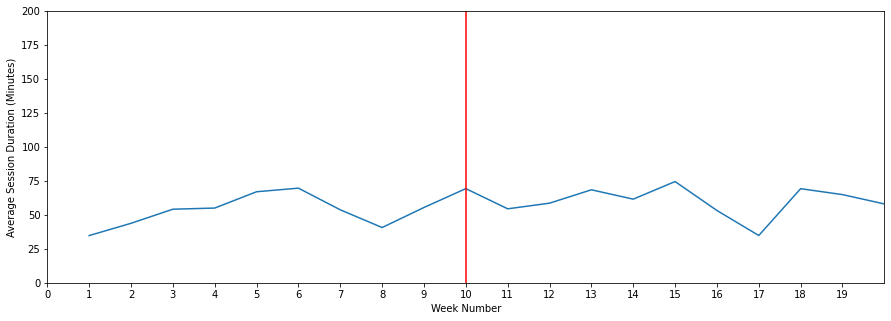

data-to-use/33_62.csv


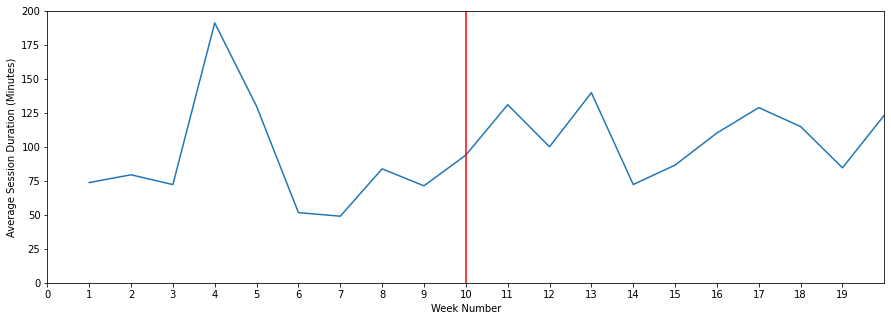

data-to-use/23_70.csv


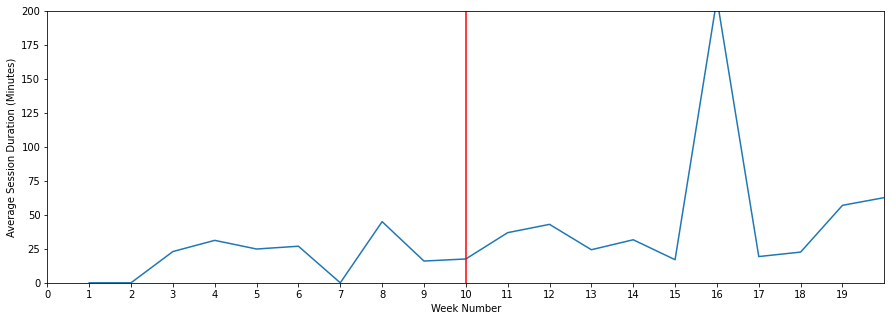

data-to-use/14_31.csv


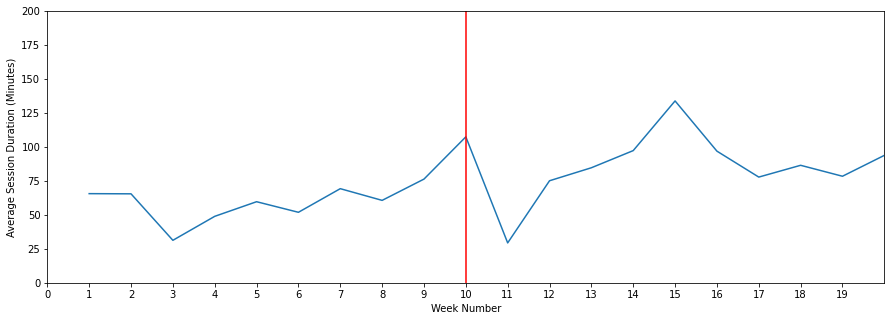

data-to-use/7_43.csv


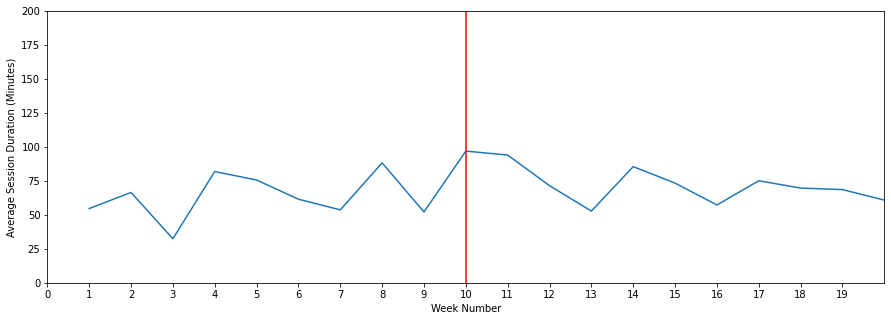

data-to-use/11_38.csv


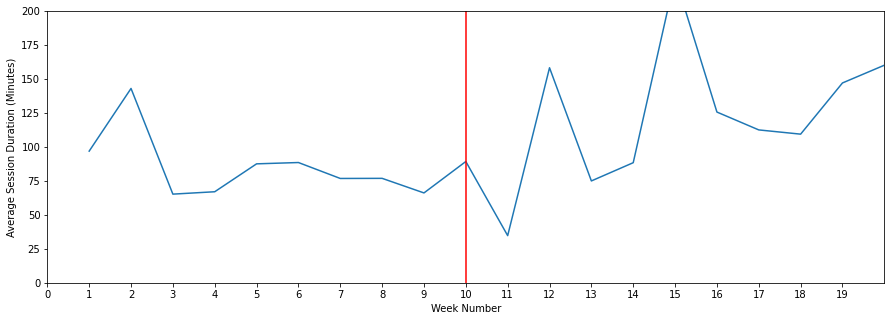

data-to-use/1_22.csv


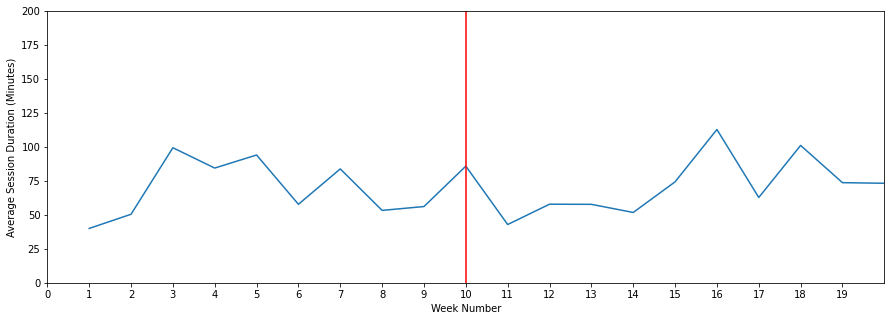

data-to-use/26_85.csv


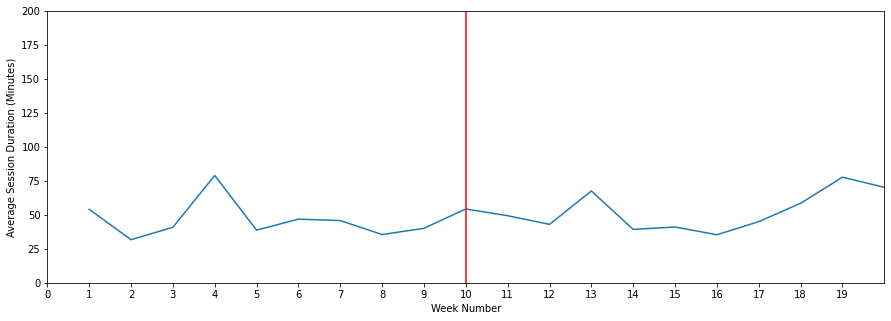

data-to-use/20_26.csv


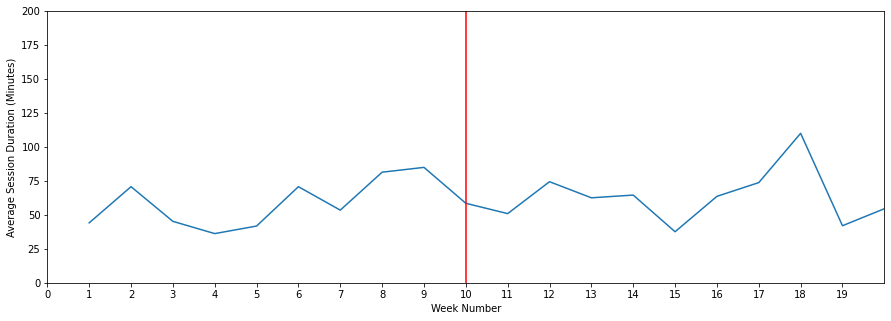

data-to-use/32_17.csv


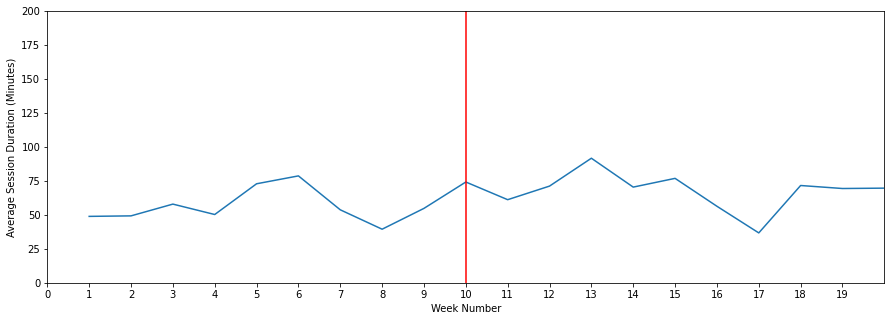

data-to-use/31_84.csv


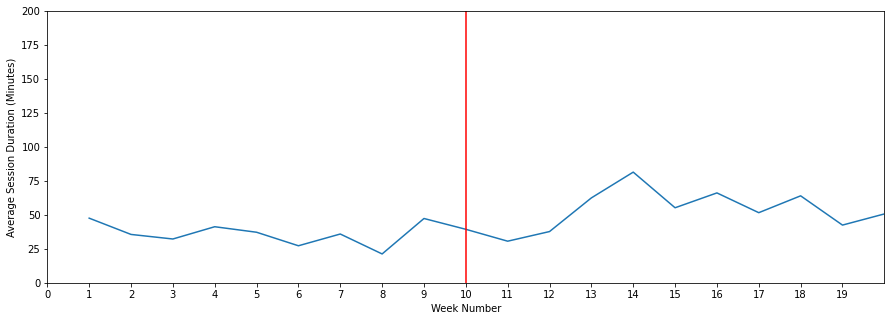

data-to-use/29_30.csv


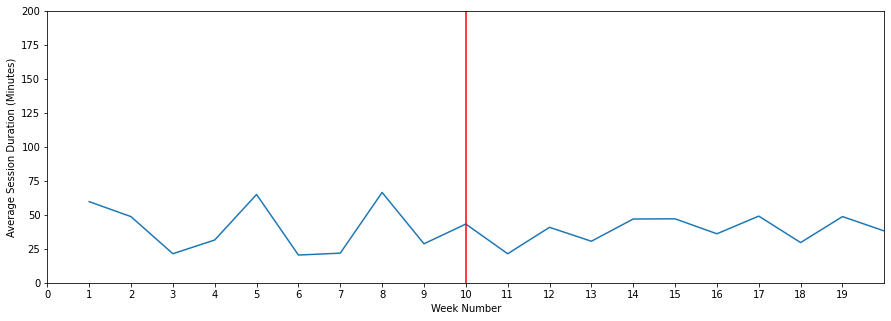

data-to-use/24_64.csv


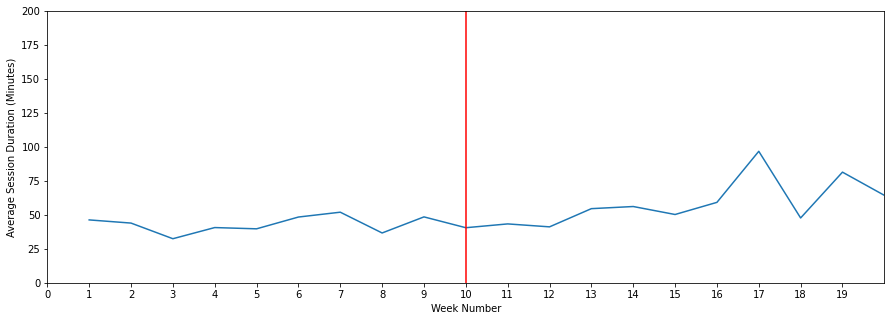

data-to-use/17_40.csv


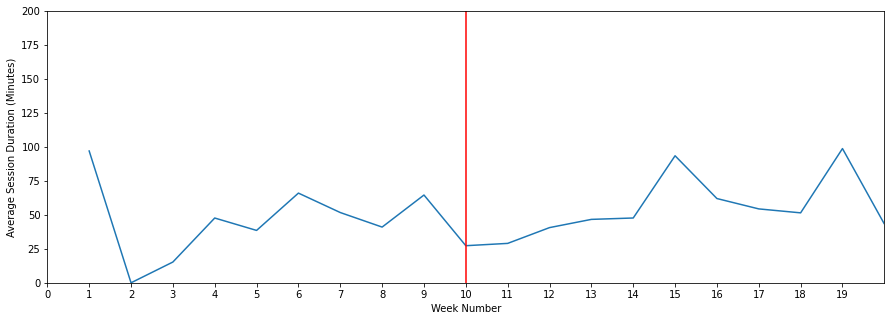

data-to-use/13_24.csv


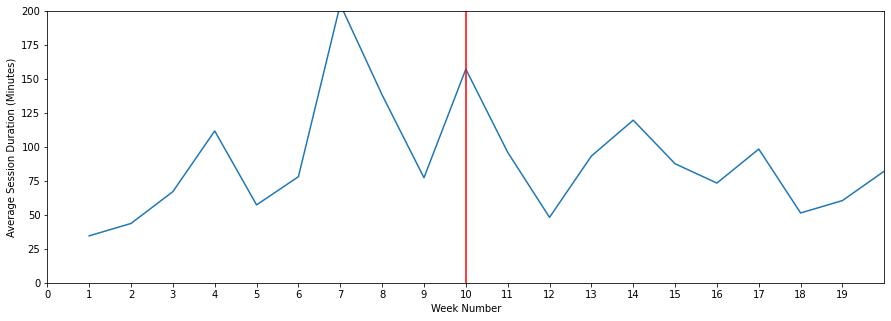

data-to-use/18_11.csv


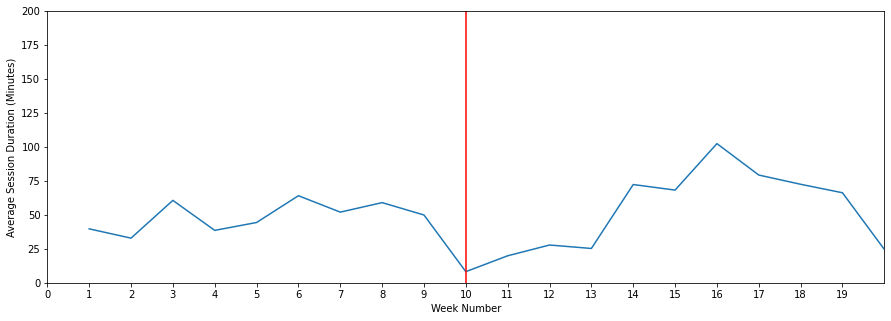

data-to-use/9_66.csv


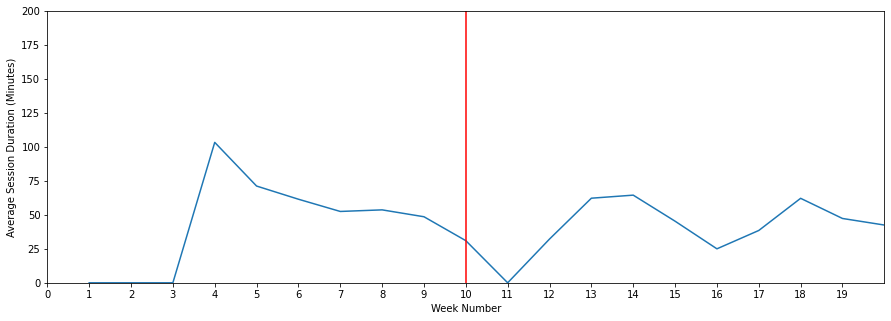

data-to-use/36_63.csv


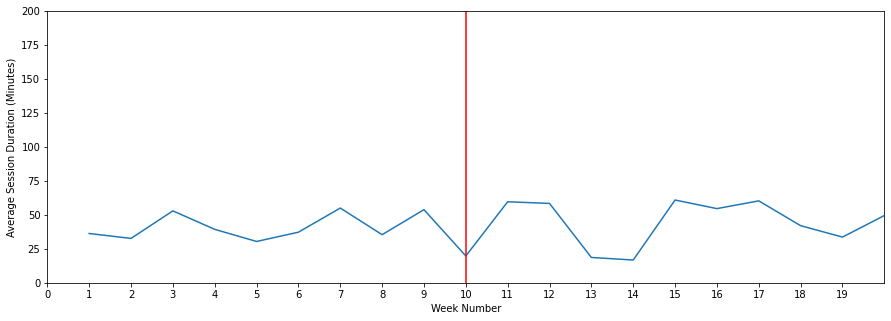

data-to-use/3_77.csv


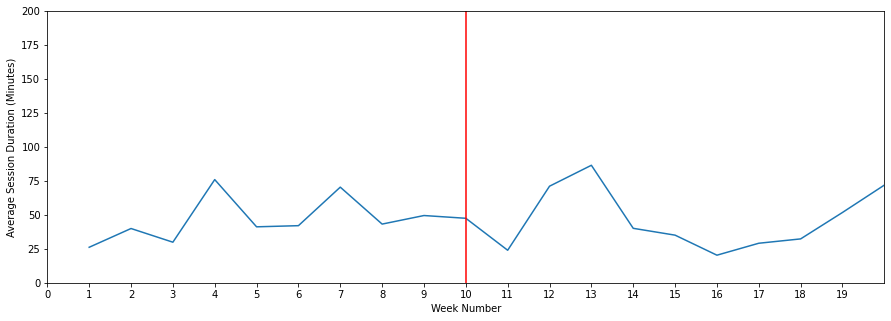

data-to-use/25_79.csv


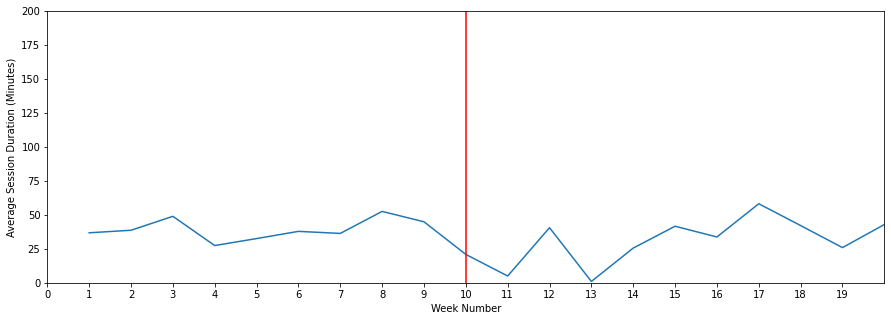

data-to-use/21_8.csv
data-to-use/8_41.csv


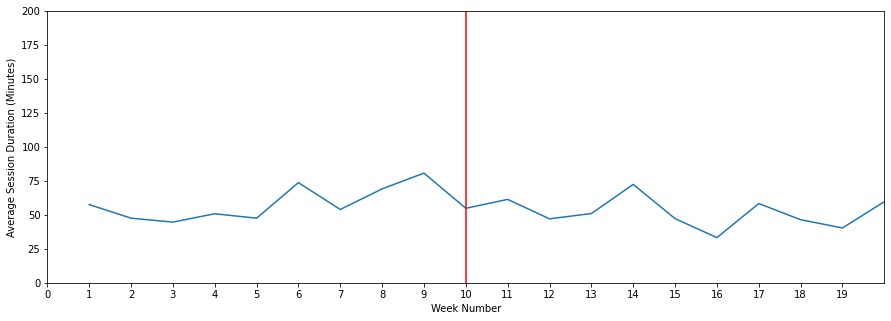

data-to-use/27_47.csv


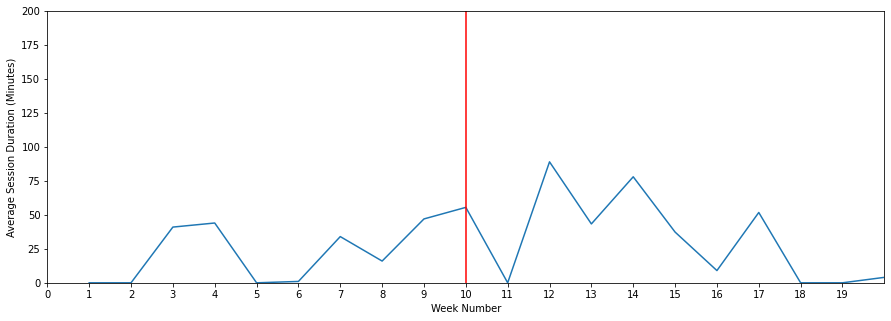

data-to-use/4_50.csv


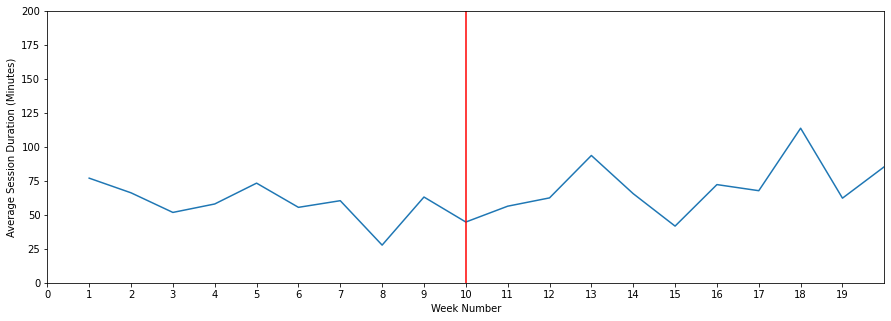

data-to-use/28_16.csv


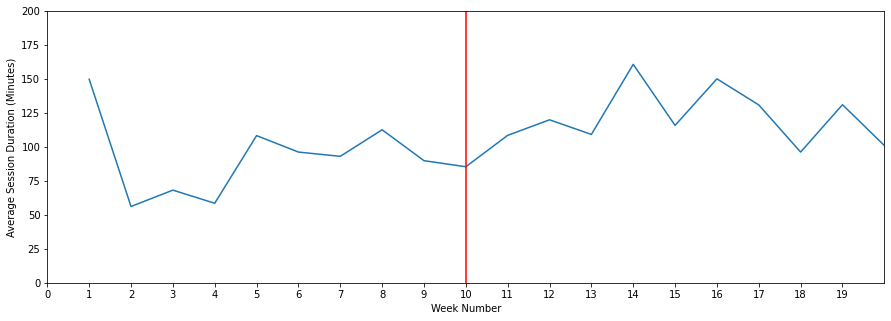

data-to-use/16_5.csv


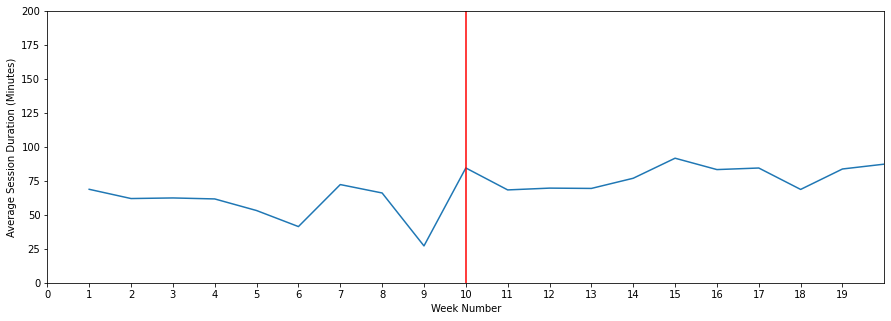

data-to-use/37_82.csv


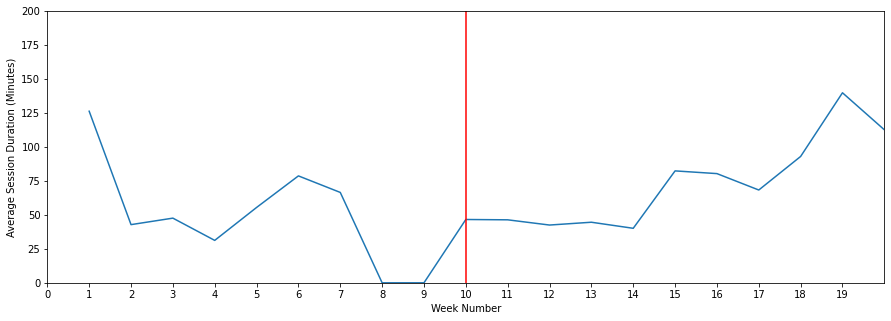

data-to-use/2_27.csv


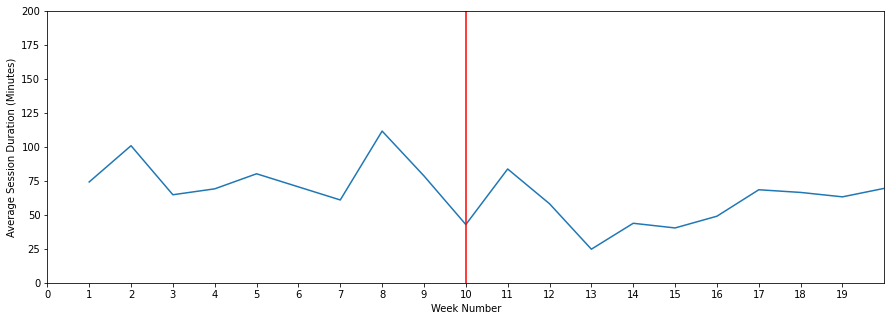

data-to-use/30_75.csv


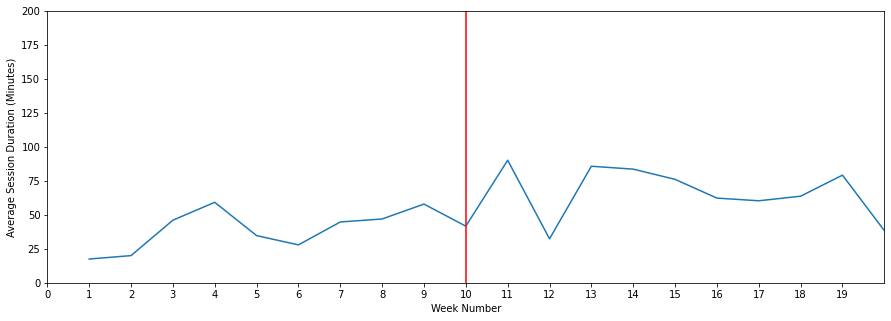

In [62]:
minimum_session_actions = 2
for f in files:
    print(f)
    user_df = create_user_df(f)
    user_sessions = create_session_list(user_df)   
    if len(user_sessions) > 0:
        user_total_sessions_one = filter_sessions(user_sessions,minimum_session_actions)
        average_daily_session_length_one = return_average_weekly(user_total_sessions_one)
        plot_dic(average_daily_session_length_one,200,'Average Session Duration (Minutes)')

## Average duration in minutes of a session for each week.
- Blue line = sessions with over 2 actions
- Orange line = sesssions with over 10 actions.


data-to-use/15_39.csv


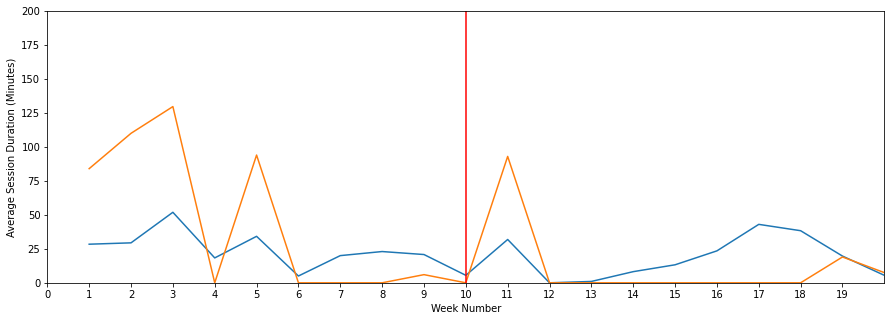

data-to-use/10_34.csv


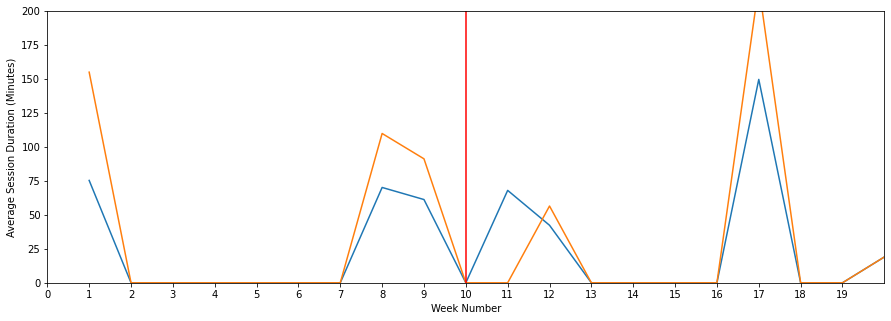

data-to-use/22_45.csv
data-to-use/6_65.csv


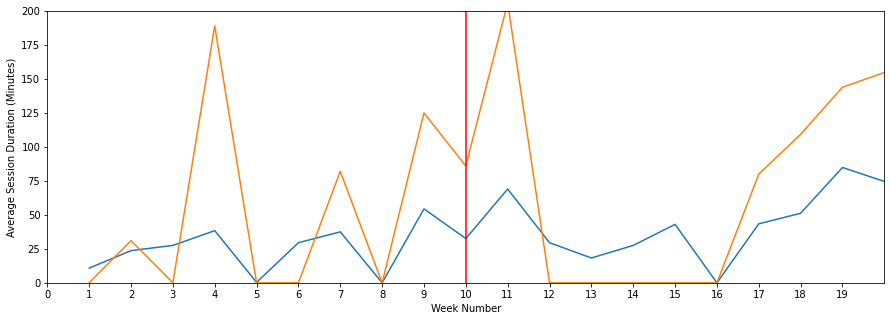

data-to-use/12_32.csv


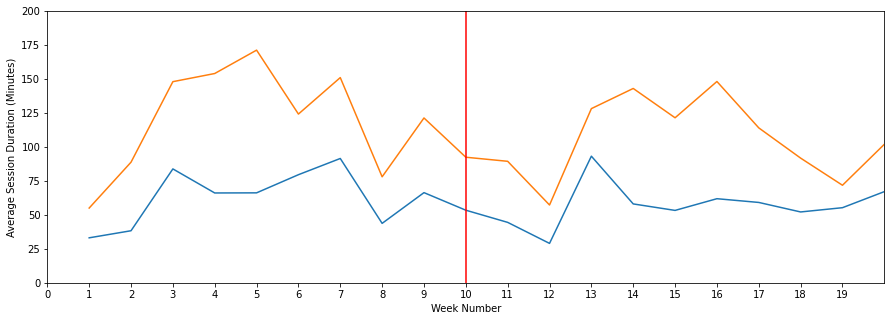

data-to-use/5_19.csv


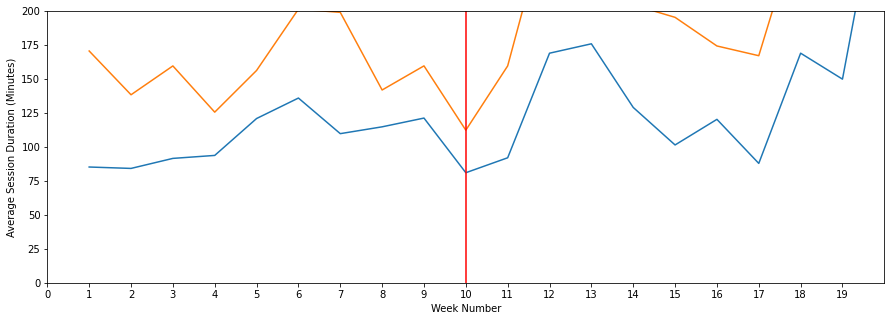

data-to-use/34_25.csv


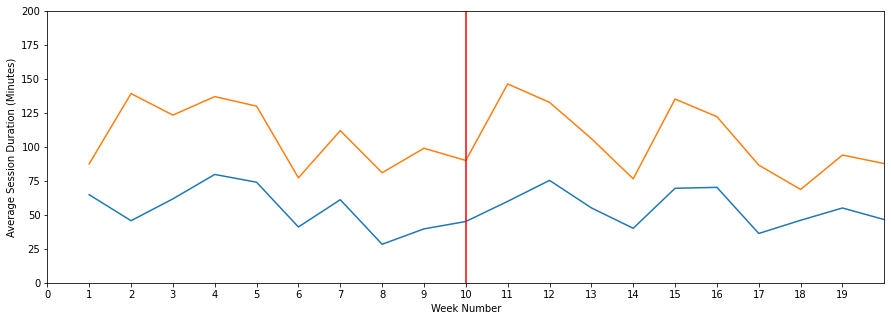

data-to-use/19_28.csv


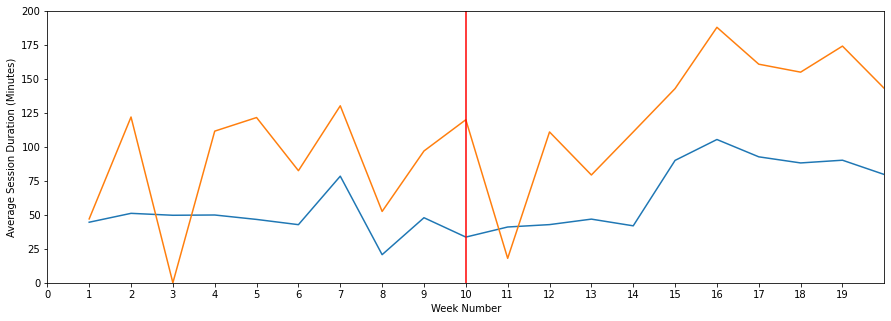

data-to-use/35_58.csv


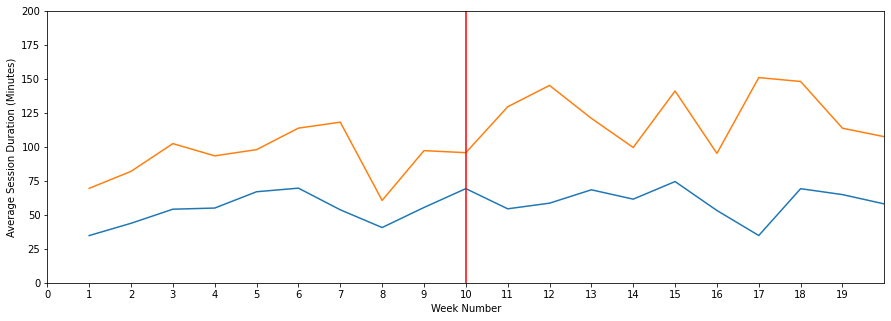

data-to-use/33_62.csv


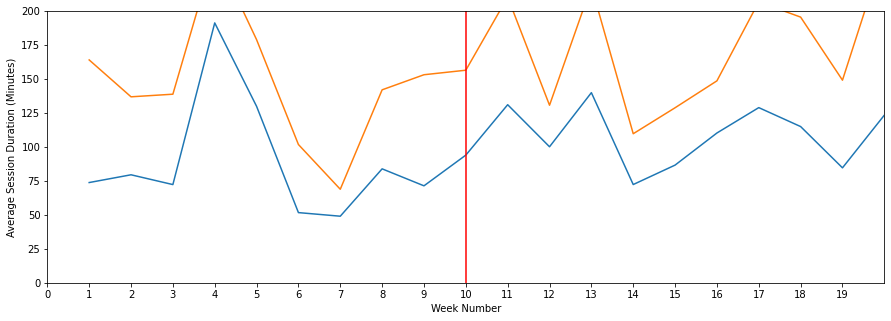

data-to-use/23_70.csv


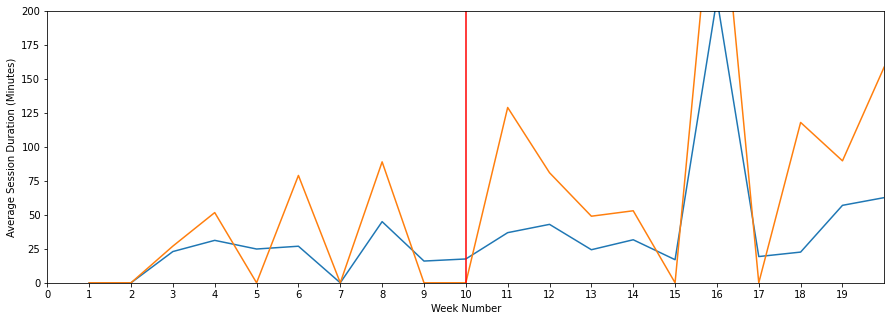

data-to-use/14_31.csv


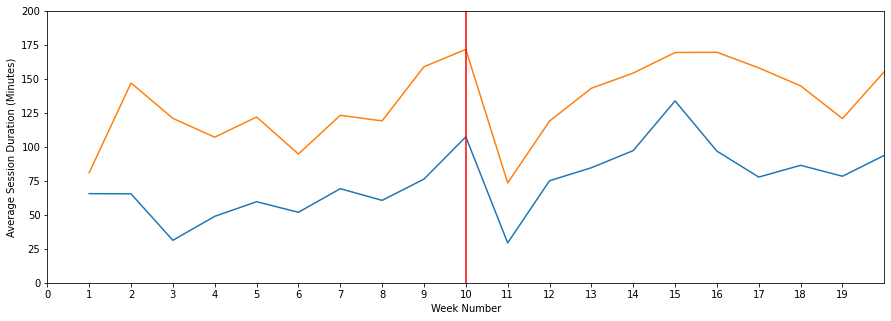

data-to-use/7_43.csv


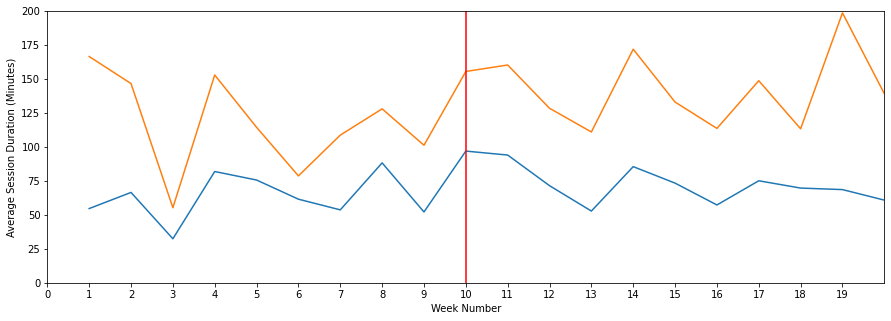

data-to-use/11_38.csv


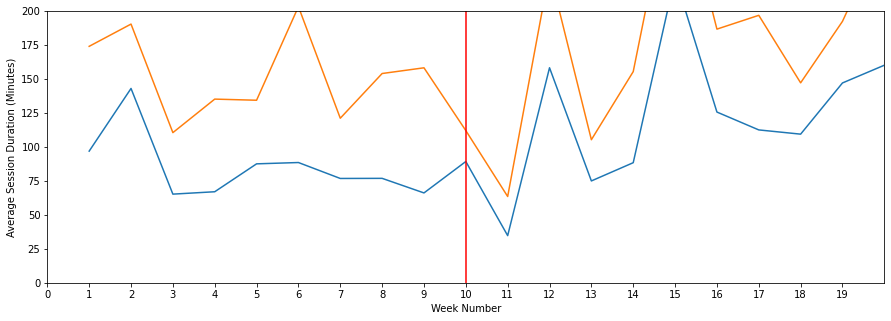

data-to-use/1_22.csv


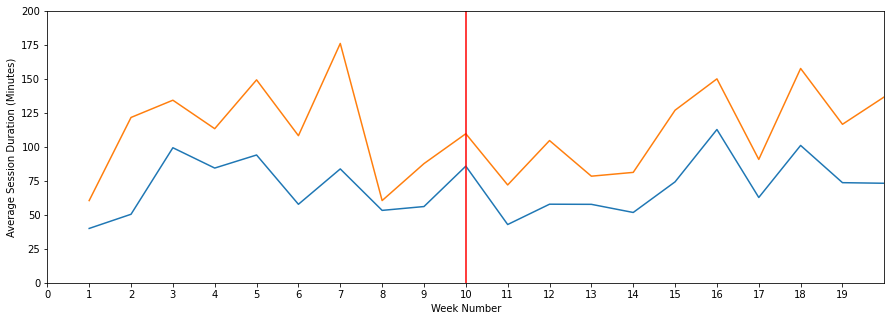

data-to-use/26_85.csv


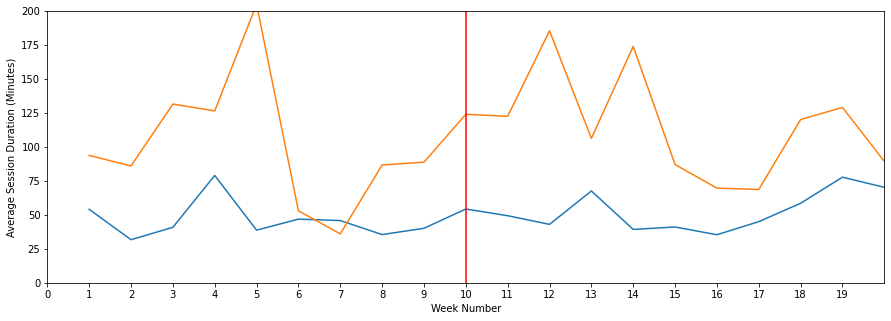

data-to-use/20_26.csv


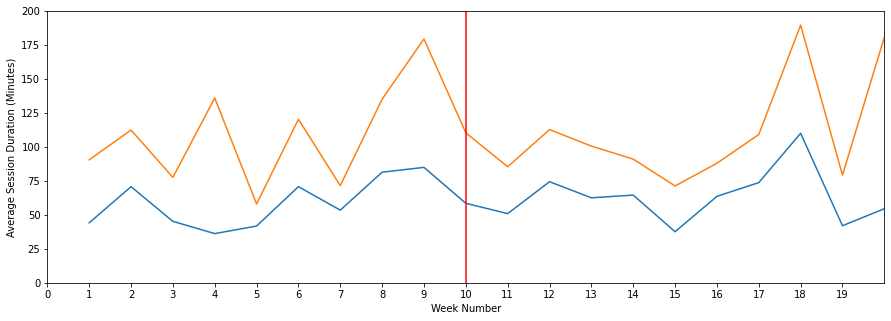

data-to-use/32_17.csv


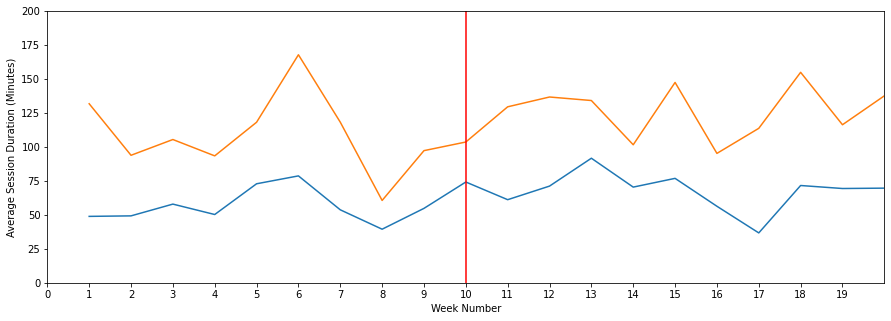

data-to-use/31_84.csv


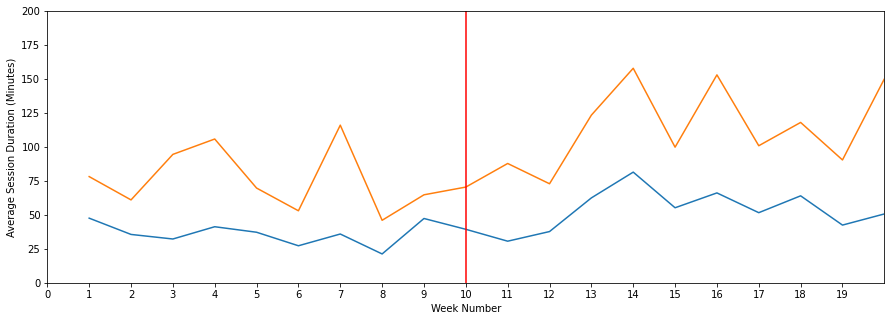

data-to-use/29_30.csv


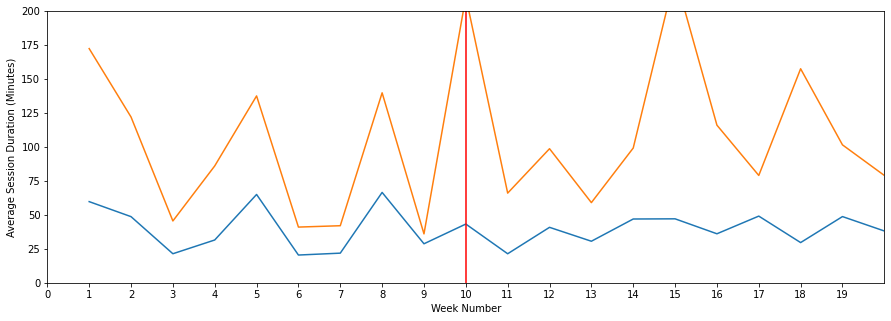

data-to-use/24_64.csv


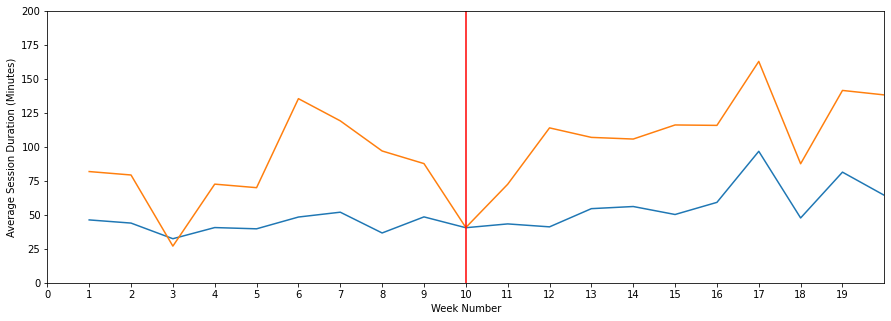

data-to-use/17_40.csv


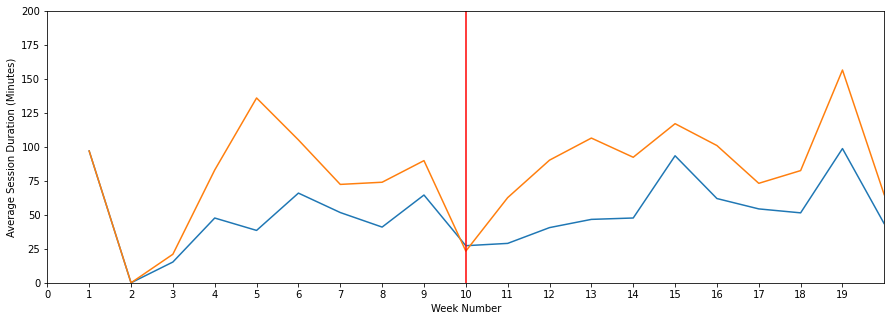

data-to-use/13_24.csv


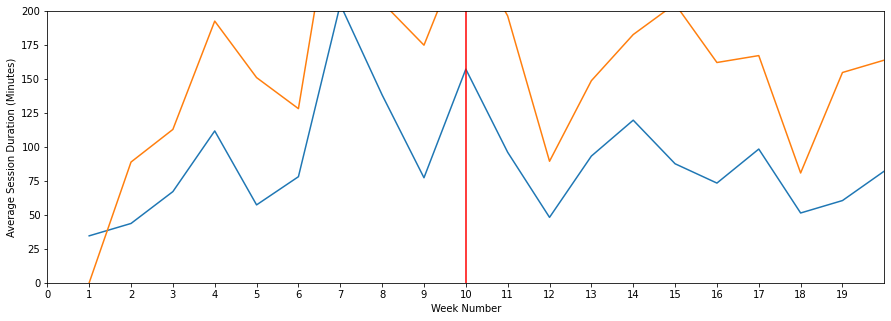

data-to-use/18_11.csv


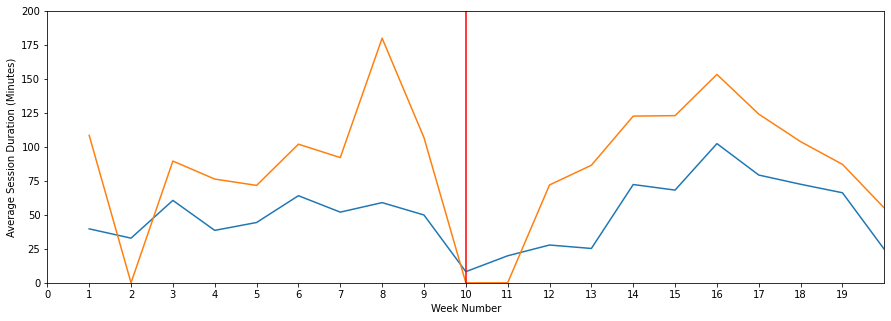

data-to-use/9_66.csv


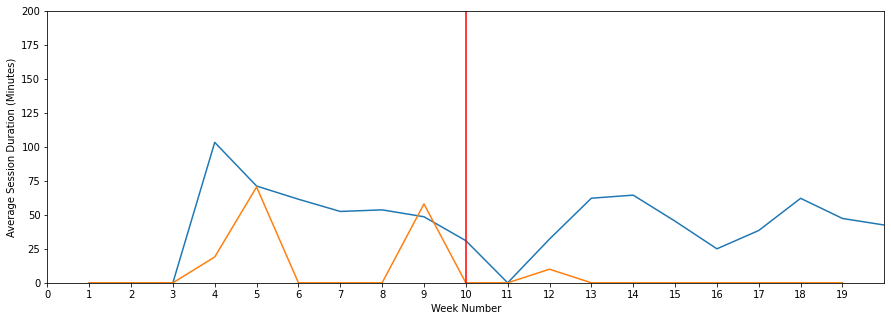

data-to-use/36_63.csv


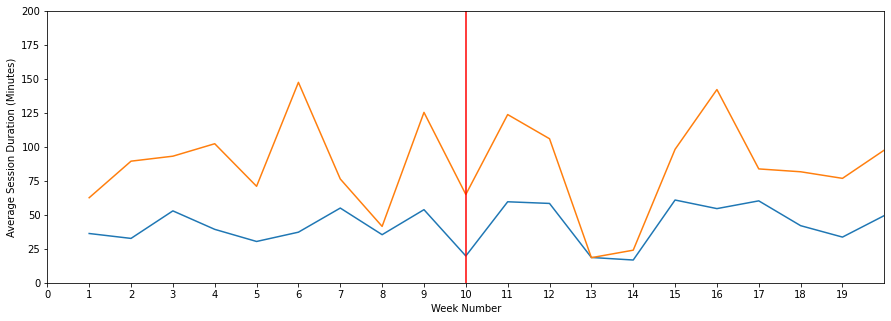

data-to-use/3_77.csv


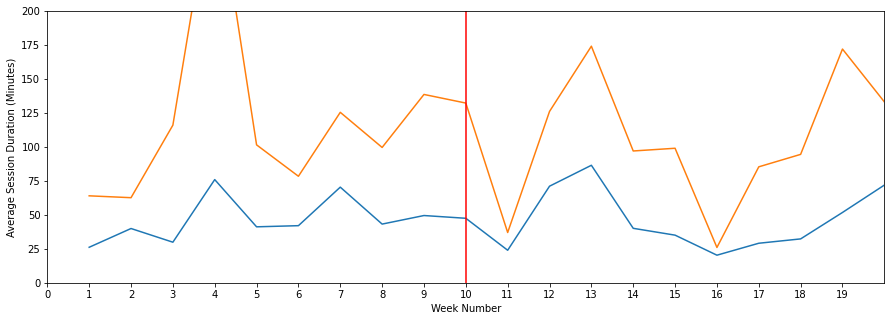

data-to-use/25_79.csv


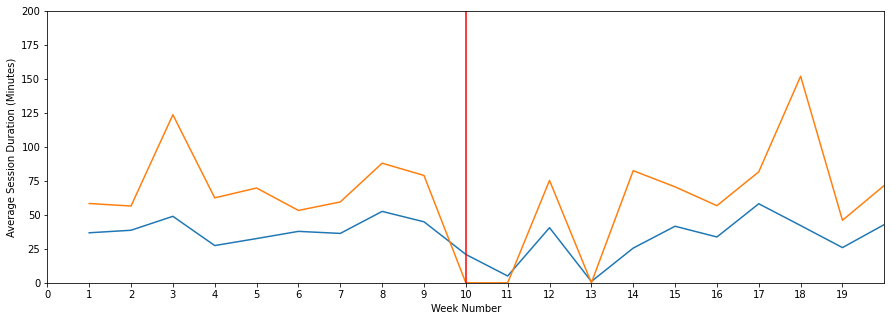

data-to-use/21_8.csv
data-to-use/8_41.csv


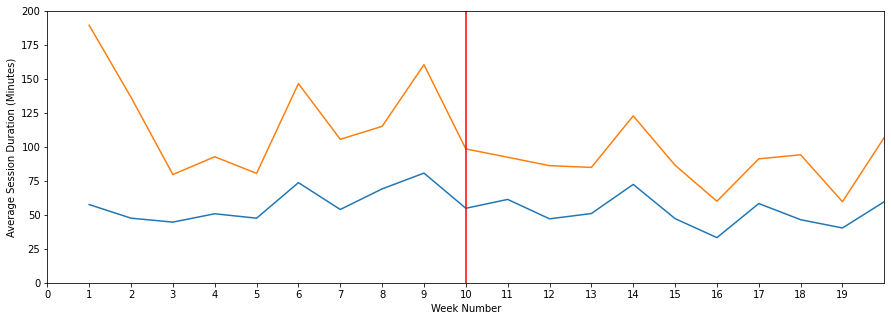

data-to-use/27_47.csv


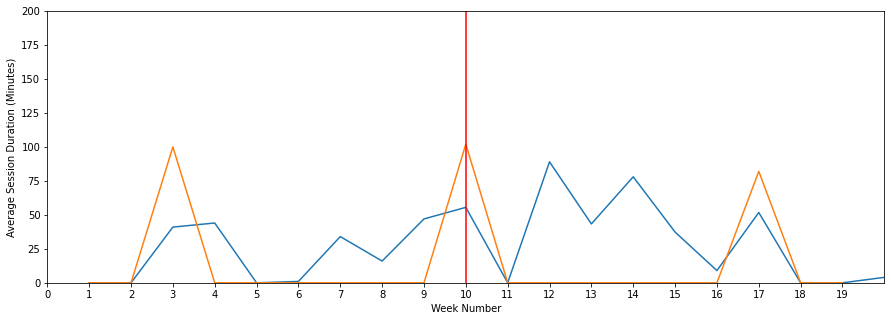

data-to-use/4_50.csv


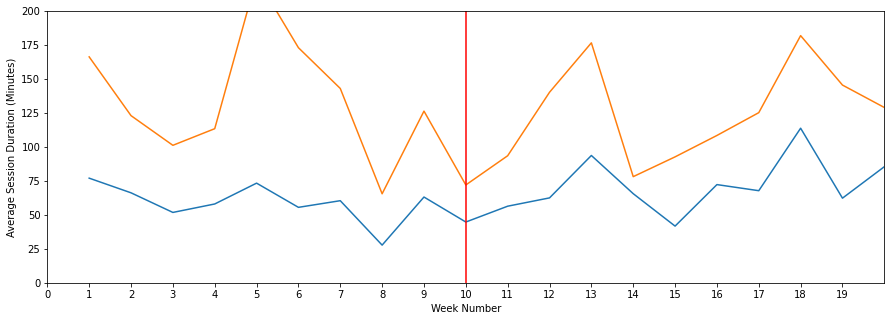

data-to-use/28_16.csv


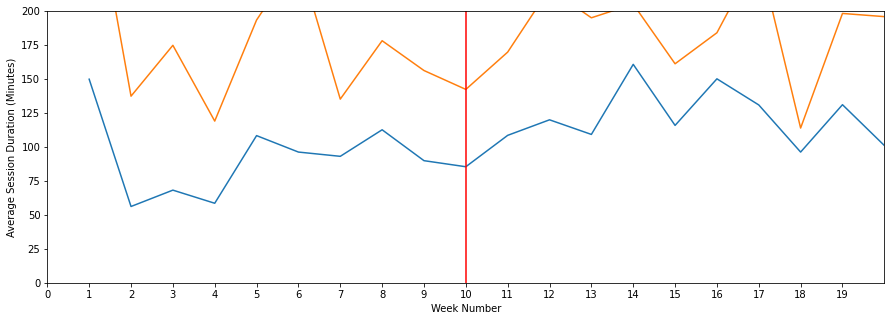

data-to-use/16_5.csv


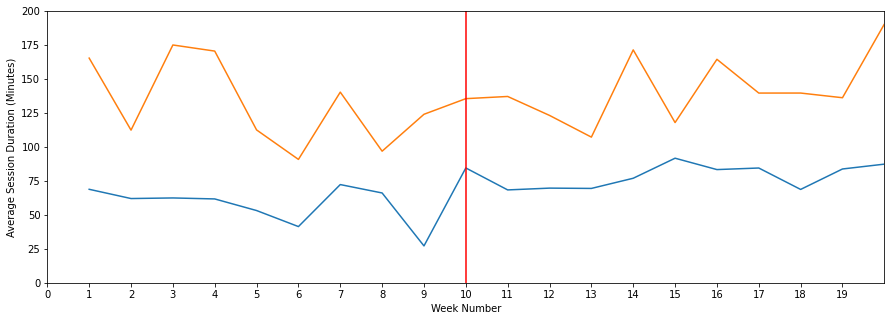

data-to-use/37_82.csv


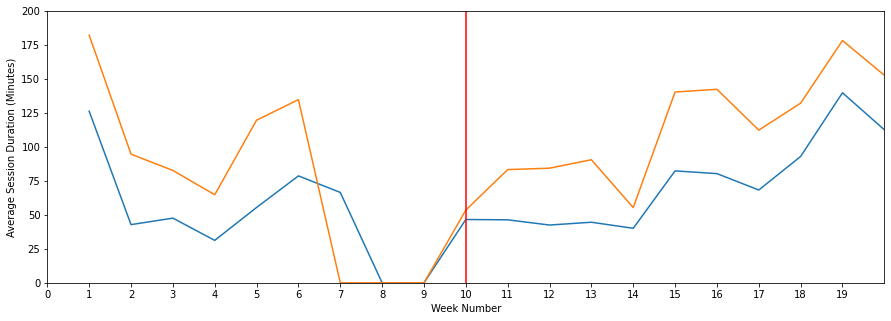

data-to-use/2_27.csv


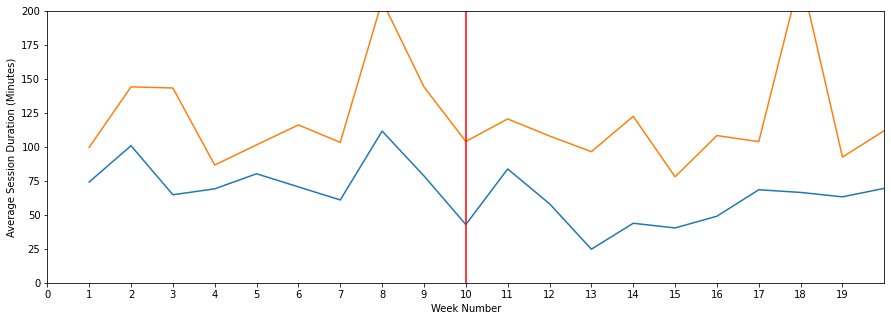

data-to-use/30_75.csv


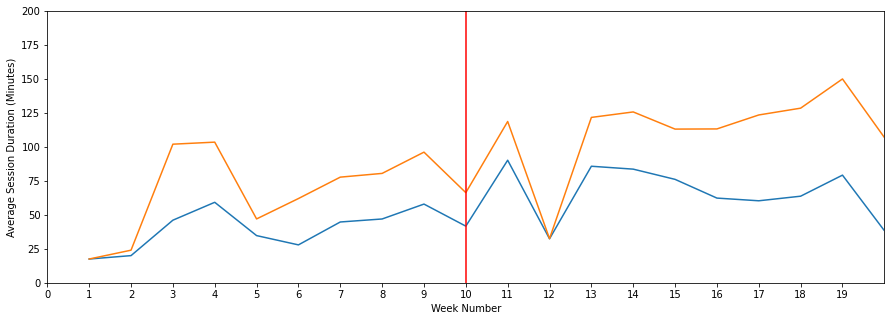

In [63]:
for f in files:
    print(f)
    user_df = create_user_df(f)
    user_sessions = create_session_list(user_df)   
    if len(user_sessions) > 0:
        user_total_sessions_one = filter_sessions(user_sessions,2)
        average_daily_session_length_one = return_average_weekly(user_total_sessions_one)
        user_total_sessions_two = filter_sessions(user_sessions,10)
        average_daily_session_length_two = return_average_weekly(user_total_sessions_two)
        plot_dic_two(average_daily_session_length_one,average_daily_session_length_two)

## Number of Unique Sessions Per Week
- blune line: sessions with over 10 actions

data-to-use/15_39.csv


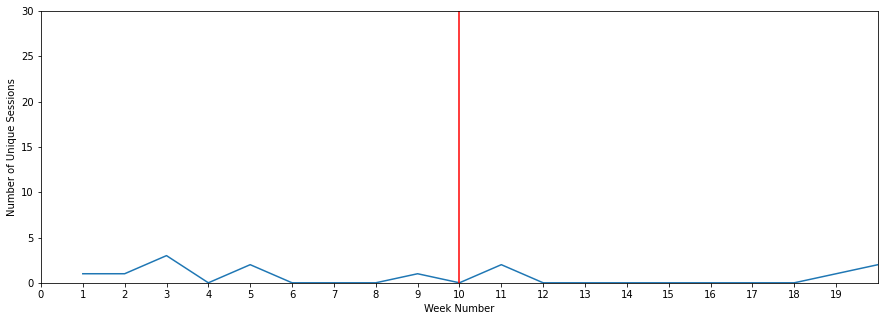

data-to-use/10_34.csv


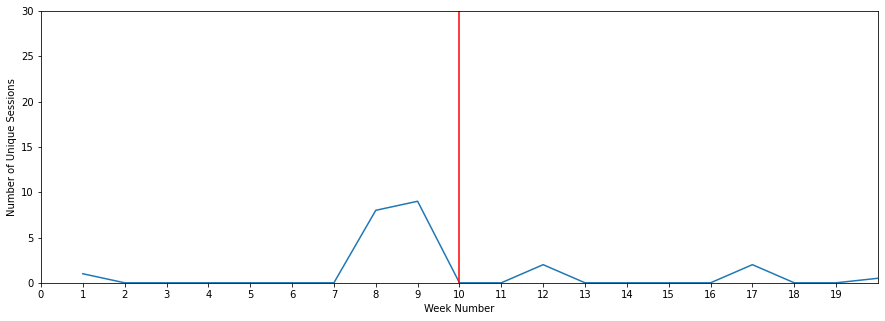

data-to-use/22_45.csv
data-to-use/6_65.csv


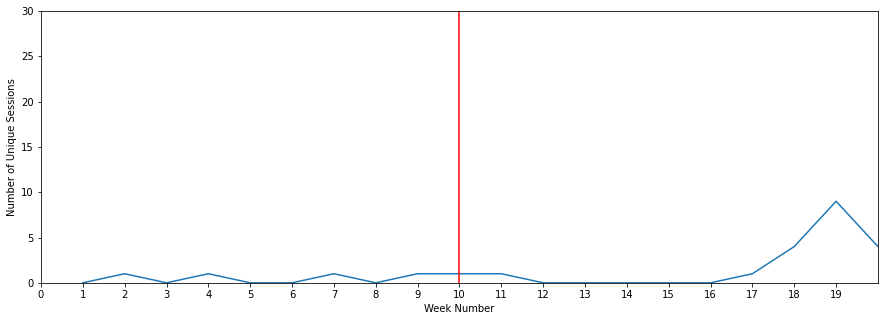

data-to-use/12_32.csv


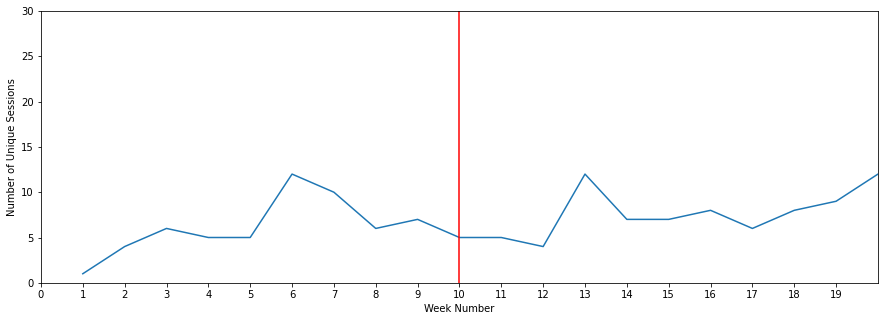

data-to-use/5_19.csv


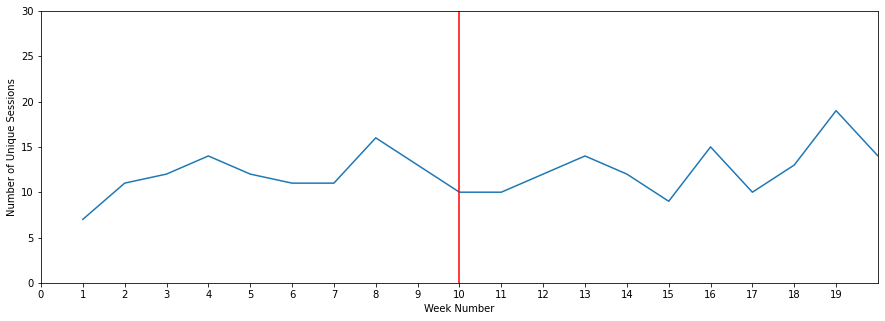

data-to-use/34_25.csv


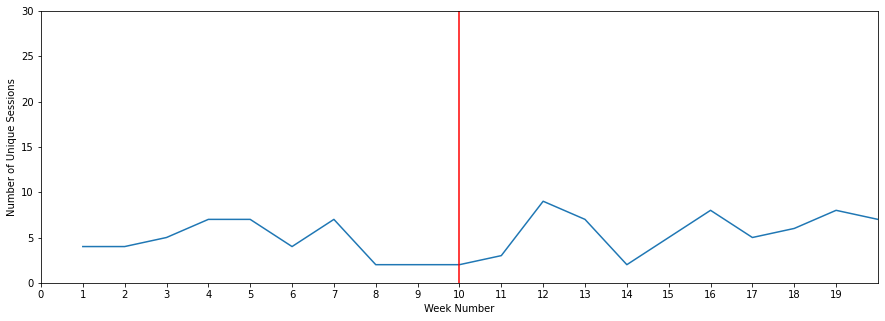

data-to-use/19_28.csv


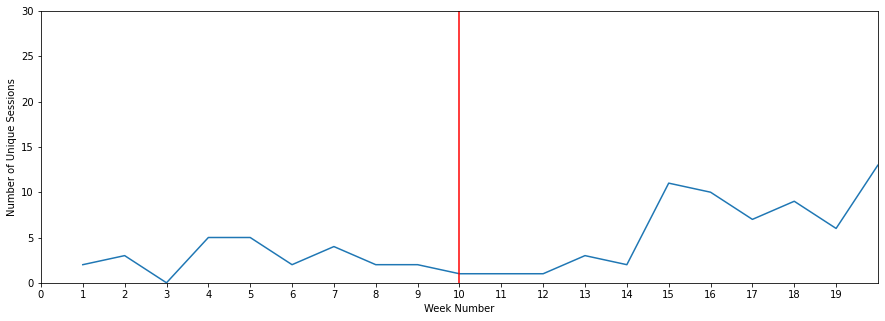

data-to-use/35_58.csv


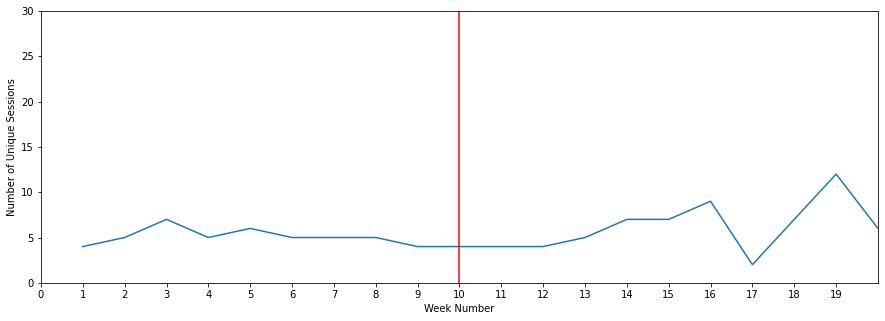

data-to-use/33_62.csv


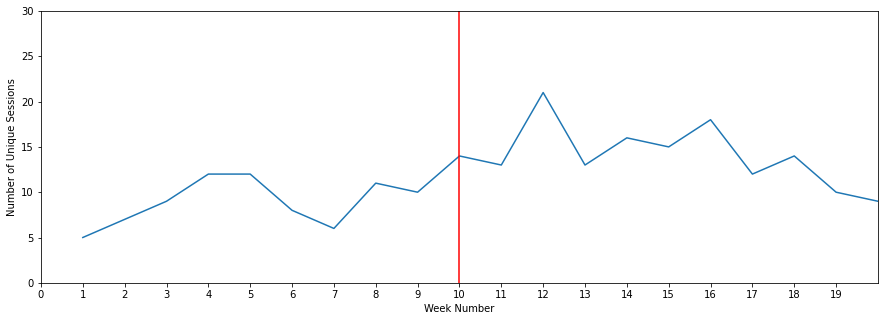

data-to-use/23_70.csv


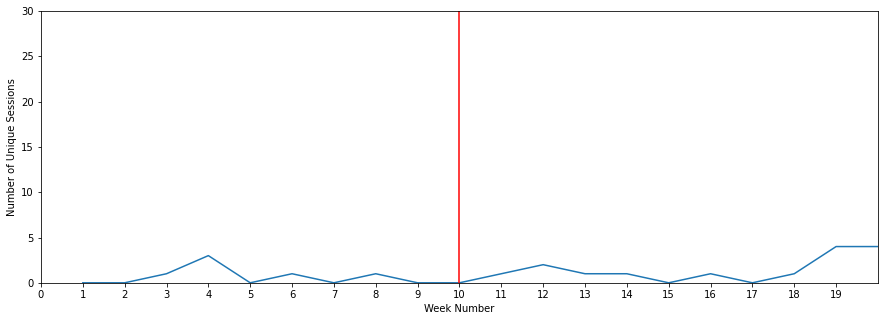

data-to-use/14_31.csv


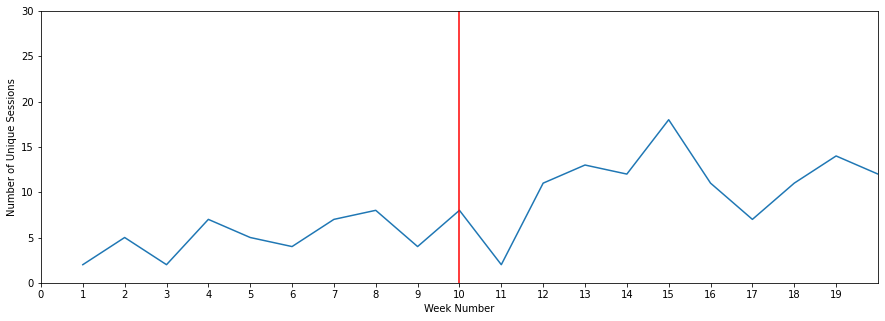

data-to-use/7_43.csv


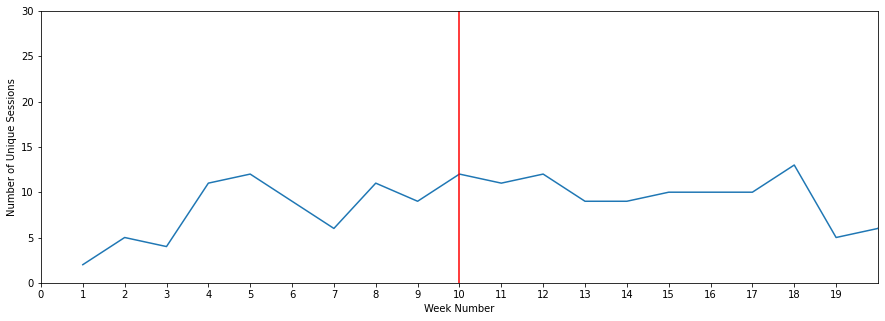

data-to-use/11_38.csv


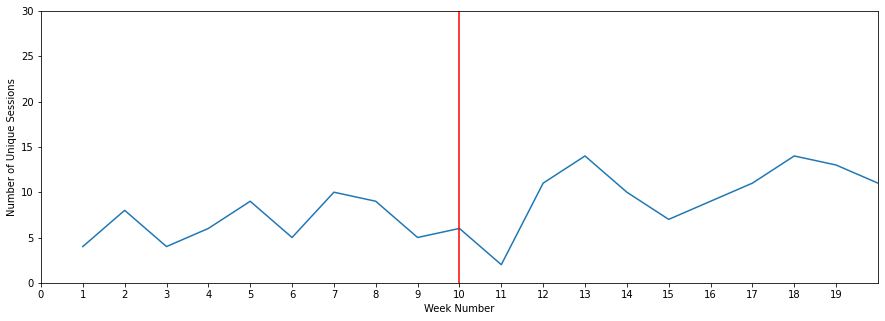

data-to-use/1_22.csv


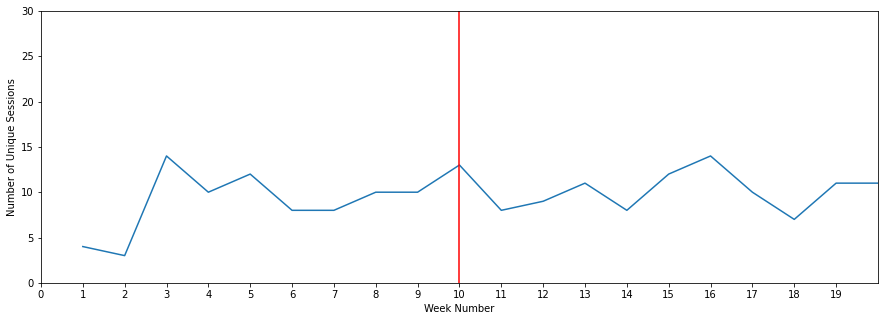

data-to-use/26_85.csv


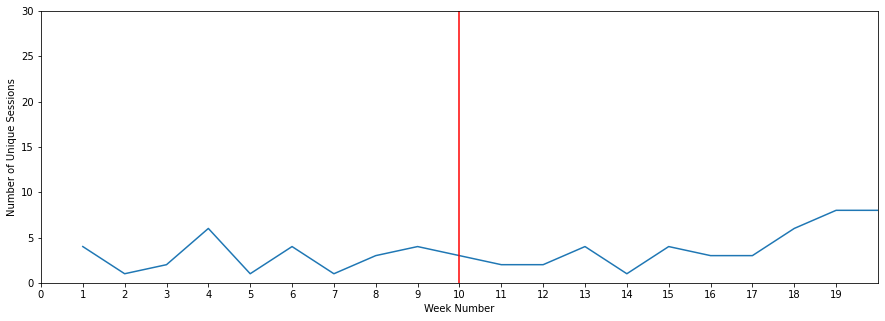

data-to-use/20_26.csv


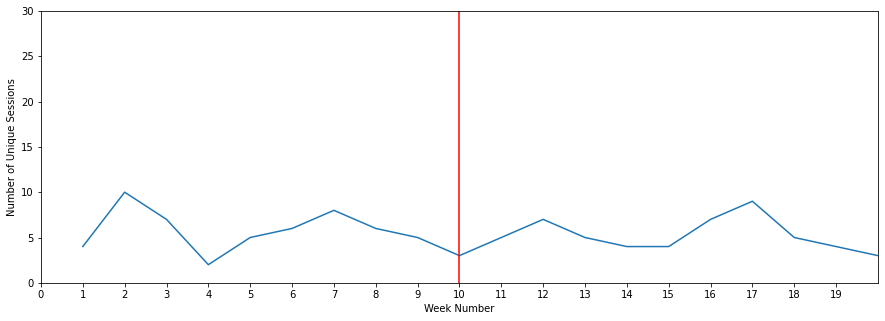

data-to-use/32_17.csv


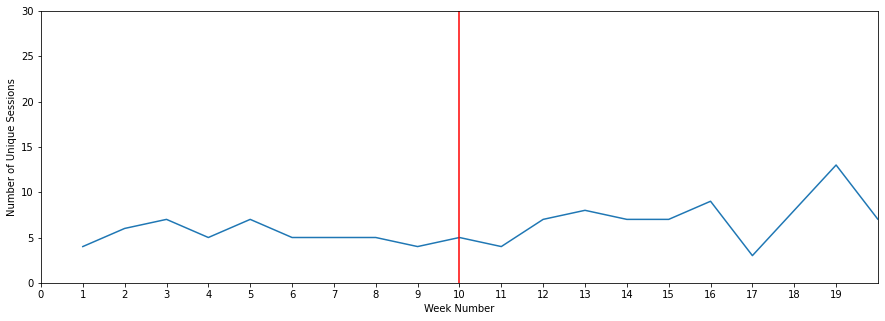

data-to-use/31_84.csv


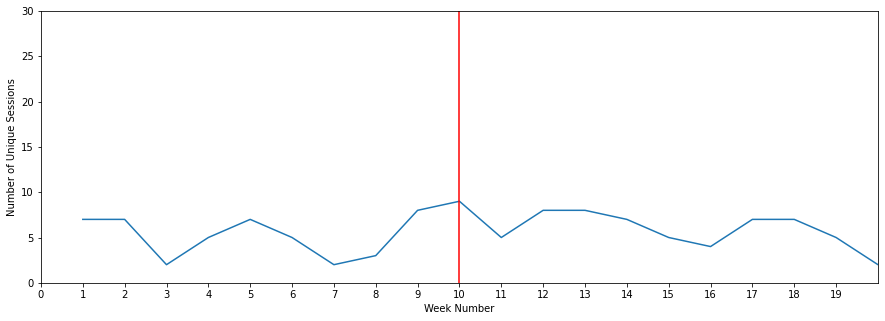

data-to-use/29_30.csv


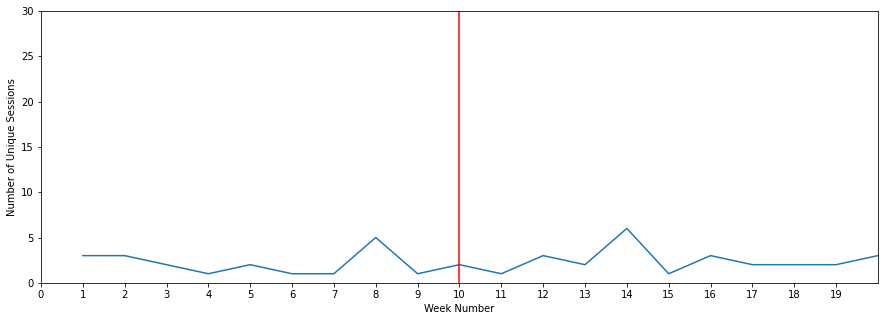

data-to-use/24_64.csv


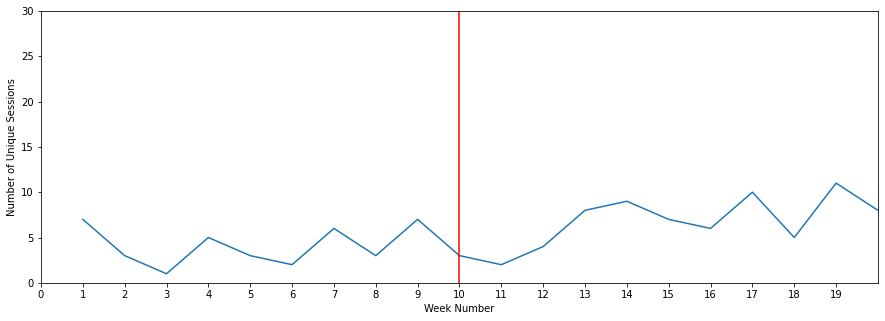

data-to-use/17_40.csv


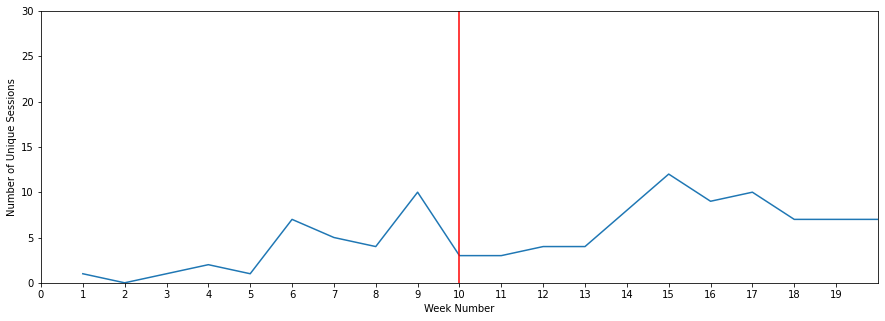

data-to-use/13_24.csv


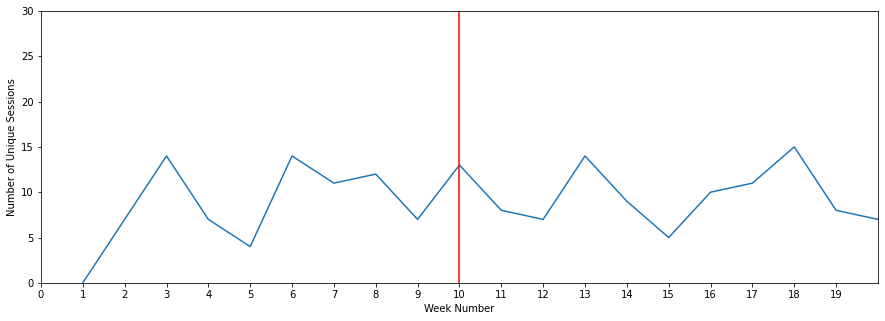

data-to-use/18_11.csv


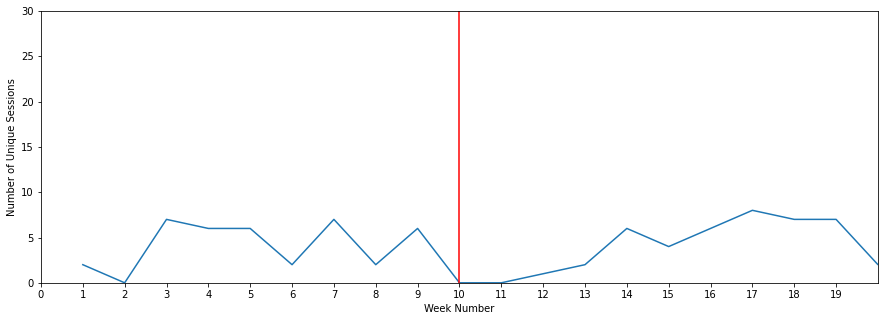

data-to-use/9_66.csv


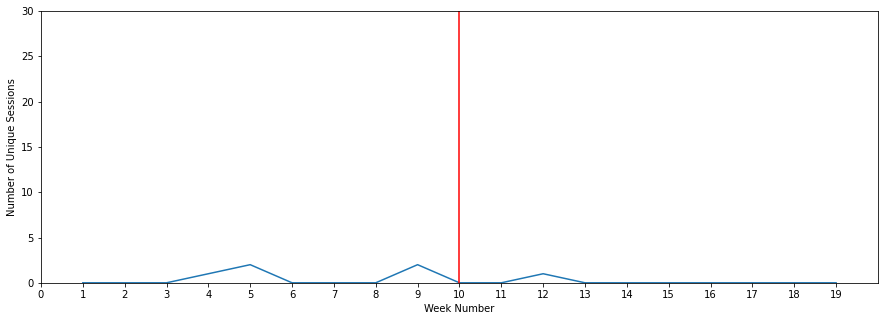

data-to-use/36_63.csv


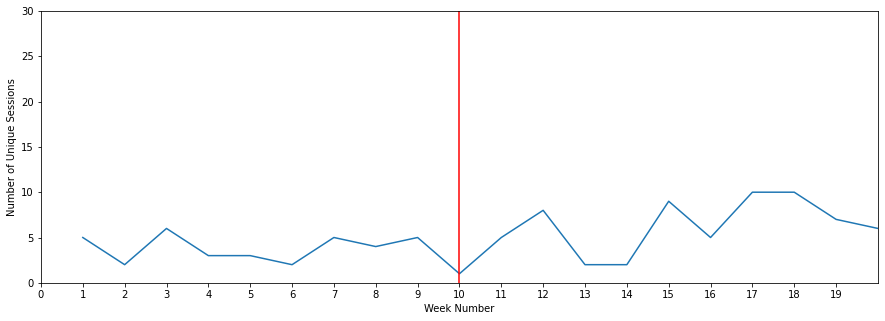

data-to-use/3_77.csv


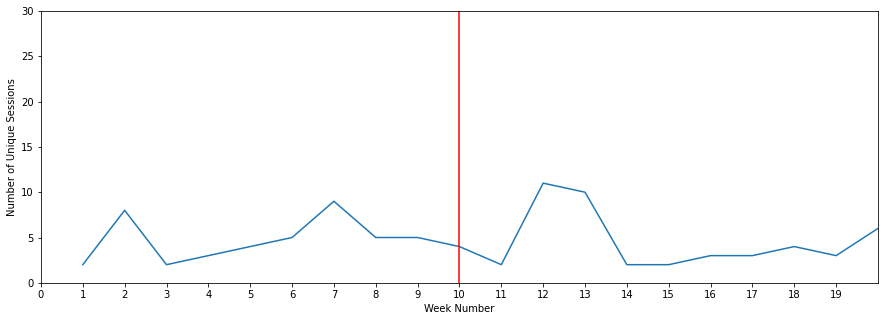

data-to-use/25_79.csv


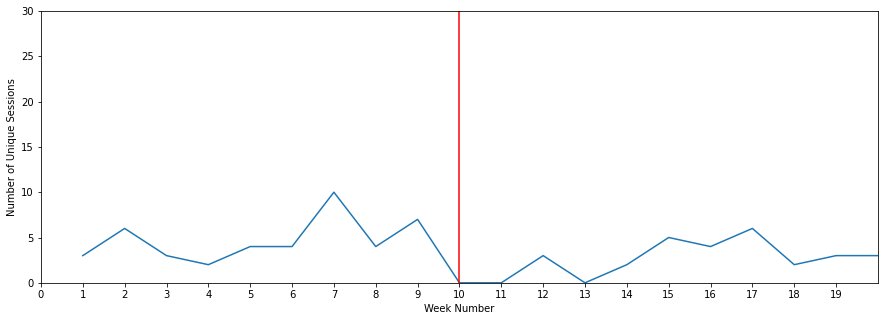

data-to-use/21_8.csv
data-to-use/8_41.csv


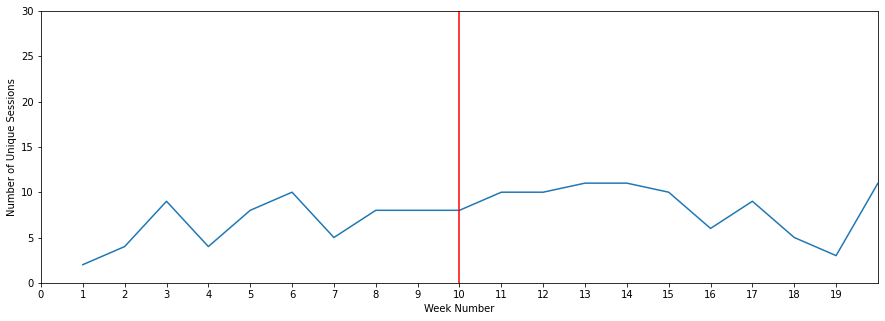

data-to-use/27_47.csv


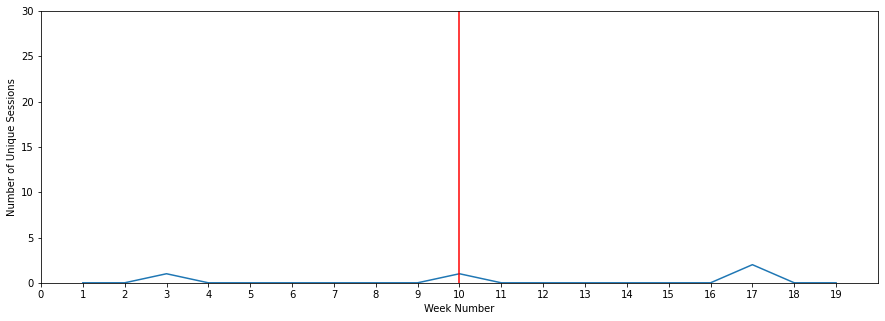

data-to-use/4_50.csv


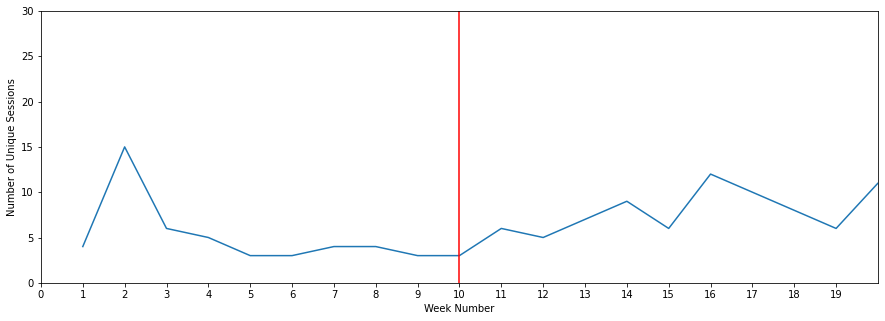

data-to-use/28_16.csv


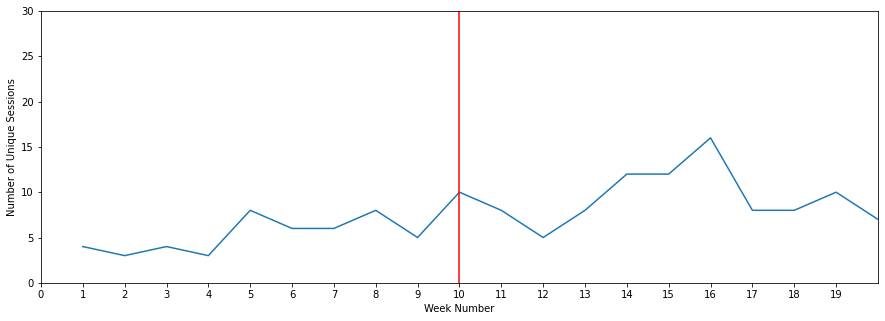

data-to-use/16_5.csv


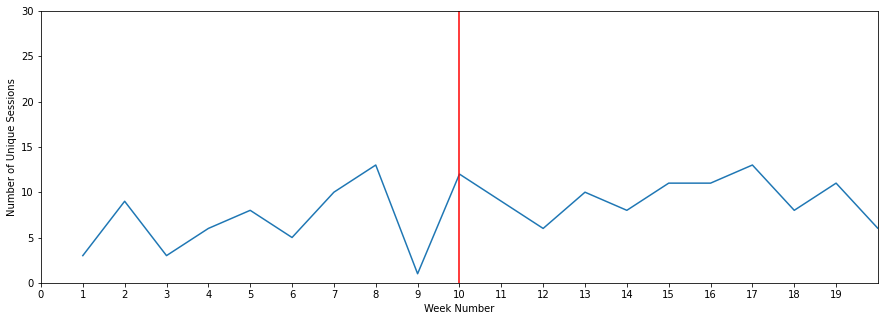

data-to-use/37_82.csv


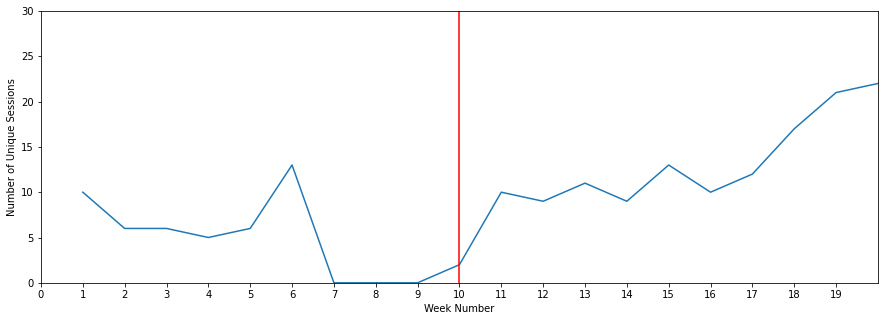

data-to-use/2_27.csv


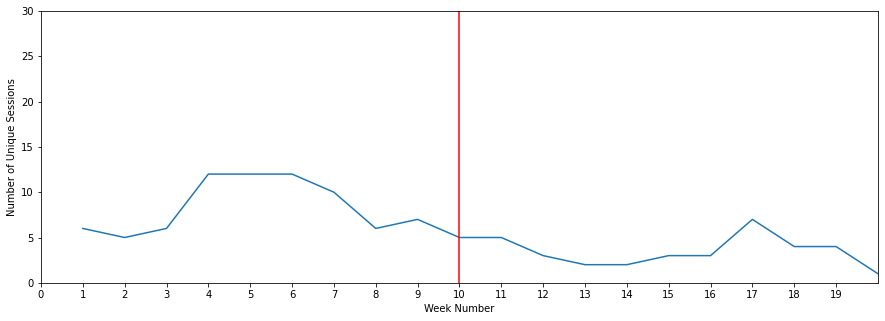

data-to-use/30_75.csv


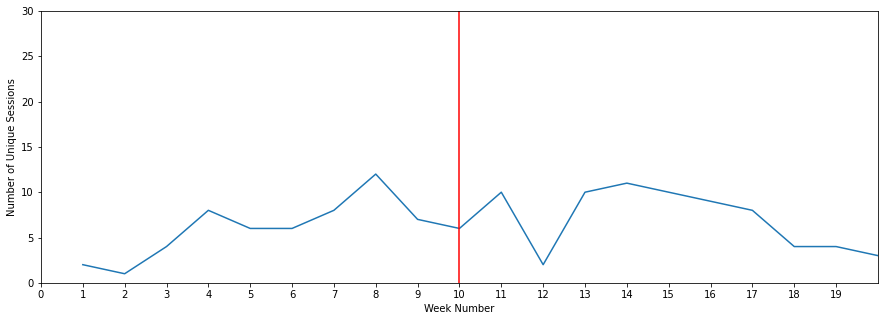

In [64]:
minimum_session_actions = 10
for f in files:
    print(f)
    user_df = create_user_df(f)
    user_sessions = create_session_list(user_df)   
    if len(user_sessions) > 0:
        user_total_sessions_one = filter_sessions(user_sessions,minimum_session_actions)
        average_daily_session_length_one = return_count_weekly(user_total_sessions_one)
        plot_dic(average_daily_session_length_one,30,"Number of Unique Sessions")